In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('База для ЛЭТИ.xlsx')

# Обработка

In [3]:
# Отредактировать столбец роста
for i, growth in enumerate(df['Рост, м']):
    try:
        growth = float(growth)
        if growth < 10:
            growth *= 100
        df.loc[i, 'Рост, м'] = growth
    except Exception as e:
        pass

In [4]:
df.head(5)

,N,Дата операции,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)",Возраст на момент операции,Возраст на момент повторного приема,Препараты,Заболевания,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ ДО 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки",...,Unnamed: 384,"FSFI: Удовлетворение (из 6,0)",Unnamed: 386,Unnamed: 387,"FSFI: Боль (из 6,0) (6,0 - никогда)",Unnamed: 389,Unnamed: 390,"FSFI: сумма (из 36,0)",Unnamed: 392,Unnamed: 393
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12
1,NaN,2016-03-28 00:00:00,2,37.0,45.0,NaN,NaN,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2016-12-05 00:00:00,1,24.0,31.0,NaN,Синдром Прадера-Вилли,1.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2016-03-29 00:00:00,2,43.0,51.0,NaN,"гб, аит, камни желчного пузыря",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2017-09-07 00:00:00,1,38.0,44.0,NaN,"Повторный набор веса! Миома матки (АМК), гипер...",0.0,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.iloc[0, 136] = 'Через 1-12 мес'

/tmp/ipykernel_18987/1724707377.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Через 1-12 мес' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.iloc[0, 136] = 'Через 1-12 мес'


### Заменим NaN на пропуски и описание времени добавим в название столбца

In [6]:
for i in range(len(df.columns)):
    if type(df.iloc[0, i]) != str:
        df.iloc[0, i] = ''

/tmp/ipykernel_18987/2331151346.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[0, i] = ''


In [7]:
for i, column in enumerate(df.columns):
    if 'Unnamed' in column:
        df = df.rename(columns={column: last_column + ' ' + df.iloc[0, i]})
    else:
        last_column = column
        df = df.rename(columns={column: last_column + ' ' + df.iloc[0, i]})

In [8]:
df.head(5)

,N,Дата операции,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)",Возраст на момент операции,Возраст на момент повторного приема,Препараты,Заболевания,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ ДО 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки",...,"FSFI: Оргазм (из 6,0) >12","FSFI: Удовлетворение (из 6,0) До БО","FSFI: Удовлетворение (из 6,0) Через 1-12 мес","FSFI: Удовлетворение (из 6,0) >12","FSFI: Боль (из 6,0) (6,0 - никогда) До БО","FSFI: Боль (из 6,0) (6,0 - никогда) Через 1-12 мес","FSFI: Боль (из 6,0) (6,0 - никогда) >12","FSFI: сумма (из 36,0) До БО","FSFI: сумма (из 36,0) Через 1-12 мес","FSFI: сумма (из 36,0) >12"
0,,,,,,,,,,,...,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12
1,NaN,2016-03-28 00:00:00,2,37.0,45.0,NaN,NaN,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2016-12-05 00:00:00,1,24.0,31.0,NaN,Синдром Прадера-Вилли,1.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2016-03-29 00:00:00,2,43.0,51.0,NaN,"гб, аит, камни желчного пузыря",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2017-09-07 00:00:00,1,38.0,44.0,NaN,"Повторный набор веса! Миома матки (АМК), гипер...",0.0,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Удалим нулевую строку
df = df[1:]

In [10]:
df.index = [i for i in range(len(df))]

# Антимюллеров гормон

### Посмотрим в каких строках непустые ячейки у столбцов АМГ

In [11]:
df.columns[174:176]

Index(['АМГ, нг/мл (0,5-19,6 нг/мл) До БО', 'АМГ, нг/мл (0,5-19,6 нг/мл) Черз 6-12 мес'], dtype='object')

In [12]:
not_empty_rows = []
for i, elem in enumerate(zip(df.iloc[:, 174], df.iloc[:, 175])):
    if all([not np.isnan(elem[0]), not np.isnan(elem[1])]):
        not_empty_rows.append(i)

### Достанем все столбцы, в строках not_empty_rows которых больше 70% непустых значений

In [13]:
not_empty_columns = []
for column in df.columns:
    try:
        count = 0
        for elem in df[column][not_empty_rows]:
            if np.isnan(elem) == False:
                count += 1
        
        if count/len(not_empty_rows) > 0.7:
            not_empty_columns.append(column)
    except:
        pass

In [14]:
len(not_empty_columns)

35

In [15]:
df_amg = df.loc[:, not_empty_columns]
df_amg = df_amg.iloc[not_empty_rows]

### Удалим лишние столбцы

In [16]:
for i, column in enumerate(df_amg.columns):
    print(i, column)

0 Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB) 
1 Возраст на момент операции 
2 НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 
3 НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 
4 Беременности 
5 Количество беременностей, закончившихся родами до БО 
6 Прерывание беременности по тем или иным причинам 
7 Курение 0 - нет, 1 - да 
8 Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да 
9 Сколько раз худела >10% (экстремальное похудение) 
10 Длительность ожирения до операции 
11 Были ли операции на яичниках 0 нет 1 да 
12 Соблюдение рекомендаций после БО 0 -нет, 1- да 
13 ИМТ на момент операции 
14 ИМТ ПОСЛЕ БО Через 12-24 (до 2 лет)
15 Глик гем, % (<6) До БО
16 Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО
17 Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) Через 6-12 мес
18 Инсулин, мкМЕ/л (2-23) До БО
19 Инсулин, мкМЕ/л (2-23) Через 6-12 мес
20 Индекс HOMA-IR (<2,7) (инсулин х г

In [17]:
df_amg = df_amg.drop(columns = ['Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) Через 6-12 мес', 'Инсулин, мкМЕ/л (2-23) Через 6-12 мес', 'АМГ 0 - АМГ БОЛЕЕ 1,1 ИЛИ РАВНО; 1- снижение менее 1,1 Черз 6-12 мес', 'АМГ 0 - АМГ БОЛЕЕ 1,1 ИЛИ РАВНО; 1- снижение менее 1,1 До БО', 'число фолликулов пр яиник >12', 'число фолликуов левый яиник >12', 'Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) Через 6-12', 'ИМТ ПОСЛЕ БО Через 12-24 (до 2 лет)', 'НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) ', 'Соблюдение рекомендаций после БО 0 -нет, 1- да ', 'ИМТ ПОСЛЕ БО Через 12-24 (до 2 лет)', ])

In [18]:
df_amg.columns

Index(['Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB) ',
       'Возраст на момент операции ',
       'НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) ',
       'Беременности ',
       'Количество беременностей, закончившихся родами до БО ',
       'Прерывание беременности по тем или иным причинам ',
       'Курение 0 - нет, 1 - да ',
       'Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да ',
       'Сколько раз худела >10% (экстремальное похудение) ',
       'Длительность ожирения до операции ',
       'Были ли операции на яичниках 0 нет 1 да ', 'ИМТ на момент операции ',
       'Глик гем, % (<6) До БО',
       'Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО',
       'Инсулин, мкМЕ/л (2-23) До БО',
       'Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО',
       'ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО',
       'АМГ, нг/мл (0,5-19,6 нг/мл) До БО',
       'АМГ, нг/мл (0,5-19,6 нг/мл) Черз 6-12 мес',
     

In [19]:
df_amg['Увеличилось ли АМГ'] = [1 if elem < 0 else 0 for elem in df_amg['АМГ, нг/мл (0,5-19,6 нг/мл) До БО'] - df_amg['АМГ, нг/мл (0,5-19,6 нг/мл) Черз 6-12 мес']] 

In [20]:
df_amg.index = [i for i in range(len(df_amg))]

In [21]:
df_amg = df_amg.drop(columns = ['АМГ, нг/мл (0,5-19,6 нг/мл) Черз 6-12 мес'])

In [22]:
df_amg.head(10)

,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)",Возраст на момент операции,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)",Беременности,"Количество беременностей, закончившихся родами до БО",Прерывание беременности по тем или иным причинам,"Курение 0 - нет, 1 - да","Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да",Сколько раз худела >10% (экстремальное похудение),Длительность ожирения до операции,...,"Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО","ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО","АМГ, нг/мл (0,5-19,6 нг/мл) До БО","ЛГ (Фолликулиновая фаза: 2.1 - 10.9 МЕ/л, Овуляторный пик: 19.2 - 103.0, Лютеиновая фаза: 1.2 - 2.9) До БО","ФСГ (Фолликулиновая фаза : 3.9 - 18.8, Овуляторный пик : 4.5 - 22.5, Лютеиновая фаза : 1.8 - 5.1) До БО","ЛГ/ФСГ (0,75-0,95) До БО","Витамин Д, нг/мл До БО",число фолликулов пр яиник До БО,число фолликуов левый яиник До БО,Увеличилось ли АМГ
0,1,34.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,5.0,...,3.4,6.3,4.2,6.1,7.8,0.782051,15,8,7,0
1,1,33.0,1.0,2.0,2.0,0.0,0.0,1.0,5.0,4.0,...,5.6,4.5,2.9,7.2,8.1,0.888889,12,10,8,1
2,1,28.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,...,4.2,4.7,2.7,6.1,5.6,1.089286,13,8,7,1
3,1,29.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.0,...,3.1,5.1,2.2,5.6,6.1,0.918033,15,8,8,1
4,1,33.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,8.0,...,5.4,5.1,2.8,5.1,7.2,0.708333,20,7,8,1
5,1,34.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,...,4.1,6.1,2.7,7.2,8.2,0.878049,23,6,5,1
6,1,36.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,...,5.1,4.9,2.1,7.1,6.2,1.145161,26,7,6,1
7,1,33.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,...,6,5.4,2,6.1,7.2,0.847222,27,6,5,1
8,1,34.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,...,7.1,4.5,1.7,5.2,10.1,0.514851,20,6,7,1
9,1,31.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,9.0,...,4.9,5.1,1.8,6.3,8.1,0.777778,21,9,6,1


In [23]:
# df_amg = df_amg.loc[:, ['ИМТ на момент операции ', 'Глик гем, % (<6) До БО',
#        'Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО',
#        'АМГ, нг/мл (0,5-19,6 нг/мл) До БО', 'Увеличилось ли АМГ']]

# Обучение

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from statistics import mean
import xgboost as xgb
import numpy as np
import random
import pickle

In [25]:
fillna_dict = {column: np.mean(df_amg[column]) for column in df_amg.columns}

In [26]:
df_amg = df_amg.fillna(fillna_dict)

In [27]:
X = df_amg.loc[:, df_amg.columns != 'Увеличилось ли АМГ']
y = df_amg.loc[:, df_amg.columns == 'Увеличилось ли АМГ']

In [28]:
model_names = ['logreg', 'knn', 'svc', 'nb', 'dt', 'rt', 'xgbx', 'nn']
models_auc_dict = {model: [] for model in model_names}
weights = {
    'LogisticRegression': [],
    'RandomForest': [], 
    'XGB': []
}
feature_names = X.columns

In [29]:
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(
    np.array(X.values), np.array(y.values), test_size=0.33, random_state=random.randint(1, 10000))

    logreg = LogisticRegression(max_iter=1500)
    dt = DecisionTreeClassifier()
    knn = KNeighborsClassifier()
    svc = SVC()
    nb = BernoulliNB()
    rt = RandomForestClassifier()
    xgbx = xgb.XGBClassifier()
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=4000)

    models = [logreg, knn, svc, nb, dt, rt, xgbx, mlp]

    for model in models:
        model.fit(X_train, y_train.ravel())
    
    for i, model in enumerate(models):
        y_pred = model.predict(X_test)
        
        models_auc_dict[model_names[i]].append(roc_auc_score(y_test, y_pred.round(0)))
    
    # Важности признаков
    importances = np.asarray(logreg.coef_[0])
    feature_scores = pd.Series(np.abs(importances), index=X.columns).sort_values(ascending=False)
    #feature_scores = ( feature_scores - min(feature_scores) )/(max(feature_scores) - min(feature_scores))
    weights['LogisticRegression'].append(feature_scores)

    importances = rt.feature_importances_
    #feature_scores = ( feature_scores - min(feature_scores) )/(max(feature_scores) - min(feature_scores))
    feature_scores = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    weights['RandomForest'].append(feature_scores)

    importances = xgbx.feature_importances_
    #feature_scores = ( feature_scores - min(feature_scores) )/(max(feature_scores) - min(feature_scores))
    feature_scores = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    weights['XGB'].append(feature_scores)

# Сохранение весов
logreg_weights = pd.DataFrame(weights['LogisticRegression'])
rt_weights = pd.DataFrame(weights['RandomForest'])
xgb_weights = pd.DataFrame(weights['XGB'])

In [49]:
xgb_weights

,Сколько раз худела >10% (экстремальное похудение),"ЛГ/ФСГ (0,75-0,95) До БО","Глик гем, % (<6) До БО","Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО","АМГ, нг/мл (0,5-19,6 нг/мл) До БО","Инсулин, мкМЕ/л (2-23) До БО","Витамин Д, нг/мл До БО",ИМТ на момент операции,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","ЛГ (Фолликулиновая фаза: 2.1 - 10.9 МЕ/л, Овуляторный пик: 19.2 - 103.0, Лютеиновая фаза: 1.2 - 2.9) До БО",...,Длительность ожирения до операции,"Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да",Были ли операции на яичниках 0 нет 1 да,"ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО","Курение 0 - нет, 1 - да",Прерывание беременности по тем или иным причинам,"Количество беременностей, закончившихся родами до БО",Беременности,число фолликулов пр яиник До БО,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)"
0,0.158600,0.157625,0.111790,0.107699,0.096099,0.091045,0.059292,0.049037,0.046931,0.038776,...,0.002838,9.538790e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.067737,0.000000,0.061777,0.222111,0.054913,0.197044,0.061783,0.045765,0.134219,0.000000,...,0.000000,1.016125e-01,0.003599,0.000000,0.000000,0.000000,0.022825,0.000000,0.016549,0.0
2,0.212238,0.024515,0.096615,0.017185,0.111526,0.110119,0.000000,0.149419,0.027933,0.033776,...,0.000000,1.566774e-01,0.024715,0.000000,0.017994,0.000000,0.000000,0.000000,0.000000,0.0
3,0.049676,0.032852,0.029631,0.213552,0.061553,0.290238,0.000000,0.012197,0.019878,0.053681,...,0.000000,0.000000e+00,0.000000,0.000000,0.043114,0.000000,0.000000,0.000000,0.000000,0.0
4,0.122790,0.113737,0.108624,0.044391,0.069508,0.000000,0.000000,0.126202,0.000000,0.000000,...,0.000000,2.659935e-02,0.000000,0.000000,0.077685,0.014402,0.000000,0.000000,0.150761,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.117246,0.029551,0.207716,0.252115,0.123878,0.000000,0.000000,0.015580,0.043878,0.017537,...,0.000465,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
96,0.011770,0.197241,0.359416,0.106997,0.075458,0.099886,0.000000,0.053056,0.013208,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.004893,0.000000,0.000000,0.000000,0.0
97,0.080055,0.128425,0.336541,0.181910,0.090088,0.000000,0.000000,0.011965,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.002138,0.000000,0.000000,0.037831,0.000000,0.0
98,0.000000,0.013867,0.181317,0.258694,0.000000,0.000000,0.000000,0.011099,0.000000,0.000000,...,0.000000,5.115089e-02,0.000000,0.123531,0.153732,0.094138,0.000000,0.000000,0.000000,0.0


In [30]:
for name in model_names:
    print(name)
    print('mean: ' + str(mean(models_auc_dict[name])))
    print()

logreg
mean: 0.6832614607614608

knn
mean: 0.7848023365523366

svc
mean: 0.6615275835275836

nb
mean: 0.5220815434565435

dt
mean: 0.7045509490509491

rt
mean: 0.7957350427350427

xgbx
mean: 0.809873445998446

nn
mean: 0.6540048007548007



### Сохранение лучшей модели

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(
#     np.array(X.values), np.array(y.values), test_size=0.33, random_state=random.randint(1, 10000))

#clf = RandomForestClassifier()
clf = xgb.XGBClassifier()
clf.fit(np.array(X.values),  np.array(y.values).ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
pickle.dump(clf, open('appendices/models/amg/xgb.pkl', 'wb'))

# Важности признаков

In [33]:
import matplotlib.pyplot as plt

### Изменение названий колонок

In [34]:
all_columns = []
all_columns.extend([*list(logreg_weights.columns), *list(rt_weights.columns), *list(xgb_weights.columns)])

In [35]:
all_columns = list(set(all_columns))

In [36]:
all_columns

['Витамин Д, нг/мл До БО',
 'Длительность ожирения до операции ',
 'АМГ, нг/мл (0,5-19,6 нг/мл) До БО',
 'ИМТ на момент операции ',
 'ЛГ (Фолликулиновая фаза: 2.1 - 10.9 МЕ/л, Овуляторный пик: 19.2 - 103.0, Лютеиновая фаза: 1.2 - 2.9) До БО',
 'Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО',
 'Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB) ',
 'Прерывание беременности по тем или иным причинам ',
 'Курение 0 - нет, 1 - да ',
 'ЛГ/ФСГ (0,75-0,95) До БО',
 'Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО',
 'число фолликулов пр яиник До БО',
 'ФСГ (Фолликулиновая фаза : 3.9 - 18.8, Овуляторный пик : 4.5 - 22.5, Лютеиновая фаза : 1.8 - 5.1) До БО',
 'Беременности ',
 'Сколько раз худела >10% (экстремальное похудение) ',
 'Количество беременностей, закончившихся родами до БО ',
 'ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО',
 'Были ли операции на яичниках 0 нет 1 да ',
 'Инсулин, мкМЕ/л (2-23) До БО',
 'Глик гем, % (<6) До БО',
 'Наследственность по ранней ме

In [37]:
rename_columns = {'Инсулин, мкМЕ/л (2-23) До БО': 'Инсулин, мкМЕ/л',
                  'Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО': 'Индекс HOMA-IR',
                  'АМГ, нг/мл (0,5-19,6 нг/мл) До БО': 'Антимюллеров гормон',
                  'Прерывание беременности по тем или иным причинам ': 'Прерывание беременности',
                  'ЛГ (Фолликулиновая фаза: 2.1 - 10.9 МЕ/л, Овуляторный пик: 19.2 - 103.0, Лютеиновая фаза: 1.2 - 2.9) До БО': 'Лютеинизирующий гормон',
                  'число фолликулов пр яиник До БО': 'Число фолликулов левый яичник',
                  'Витамин Д, нг/мл До БО': 'Витамин Д',
                  'ФСГ (Фолликулиновая фаза : 3.9 - 18.8, Овуляторный пик : 4.5 - 22.5, Лютеиновая фаза : 1.8 - 5.1) До БО': 'Фолликулостимулирующий гормон',
                  'Сколько раз худела >10% (экстремальное похудение) ': 'Сколько раз худела >10%',
                  'ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО': 'Холестерин в крови',
                  'Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB) ': 'Тип операции',
                  'Были ли операции на яичниках 0 нет 1 да ': 'Были ли операции на яичниках',
                  'число фолликуов левый яиник До БО': 'Число фолликулов правый яичник',
                  'Глик гем, % (<6) До БО': 'Гликированный гемоглобин',
                  'Курение 0 - нет, 1 - да ': 'Курение',
                  'Количество беременностей, закончившихся родами до БО ': 'Количество беременностей, закончившихся родами',
                  'ЛГ/ФСГ (0,75-0,95) До БО': 'Лютеинизирующий/Фолликулостимулирующий гормон',
                  'Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да ': 'Наследственность по ранней менопаузе',
                  'НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) ': 'Нарушение менструального цикла',
                  'Беременности ': 'Количество беременностей',
                  'Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО': 'Уровень глюкозы'}

## Логистическая регрессия

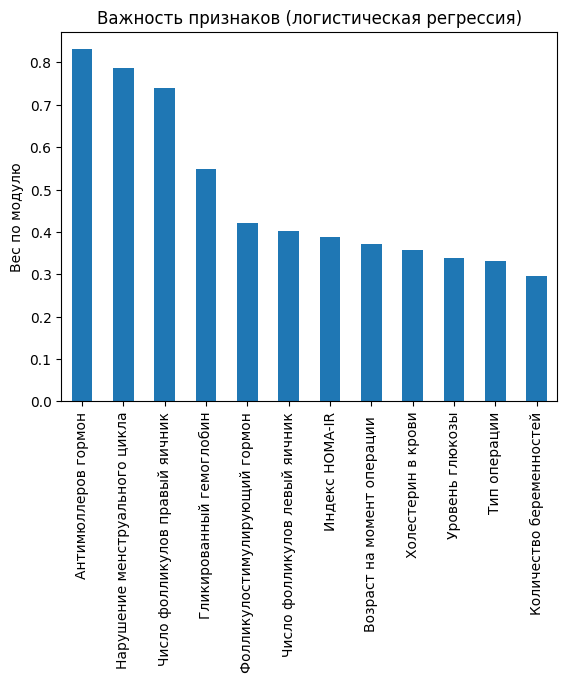

In [57]:
importances = []
for column in logreg_weights.columns:
    importances.append(mean(logreg_weights[column]))

importances = np.asarray(importances)

feature_scores = pd.Series(np.abs(importances), index=logreg_weights.columns).sort_values(ascending=False)

feature_scores = feature_scores.rename(rename_columns)

fig, ax = plt.subplots()
feature_scores[0:12].plot.bar(ax=ax)
ax.set_title("Важность признаков (логистическая регрессия)")
ax.set_ylabel("Вес по модулю")
plt.show()

## Случайный лес

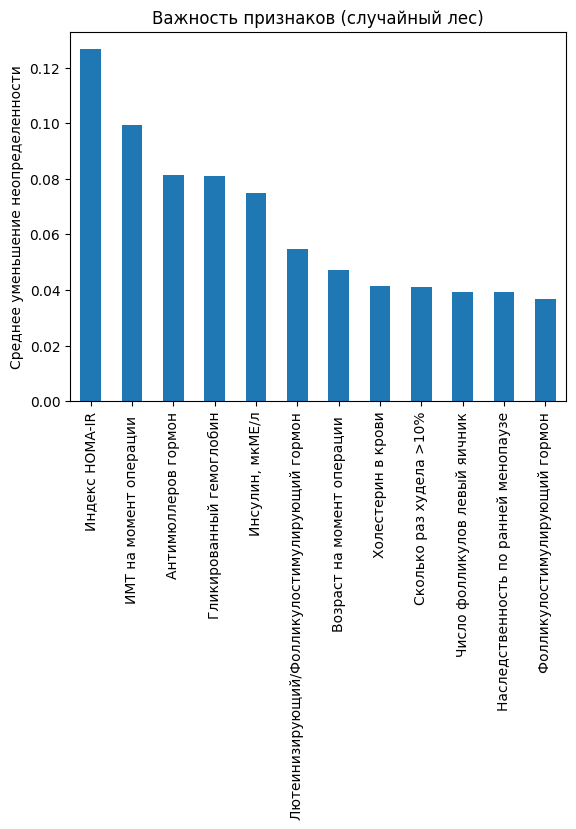

In [56]:
feature_names = X.columns

importances = []
for column in rt_weights.columns:
    importances.append(mean(rt_weights[column]))

feature_scores = pd.Series(importances, index=rt_weights.columns).sort_values(ascending=False)

feature_scores = feature_scores.rename(rename_columns)

fig, ax = plt.subplots()
feature_scores[:12].plot.bar(ax=ax)
ax.set_title("Важность признаков (cлучайный лес)")
ax.set_ylabel("Среднее уменьшение неопределенности")
plt.show()

## Экстремальный градиентный бустинг

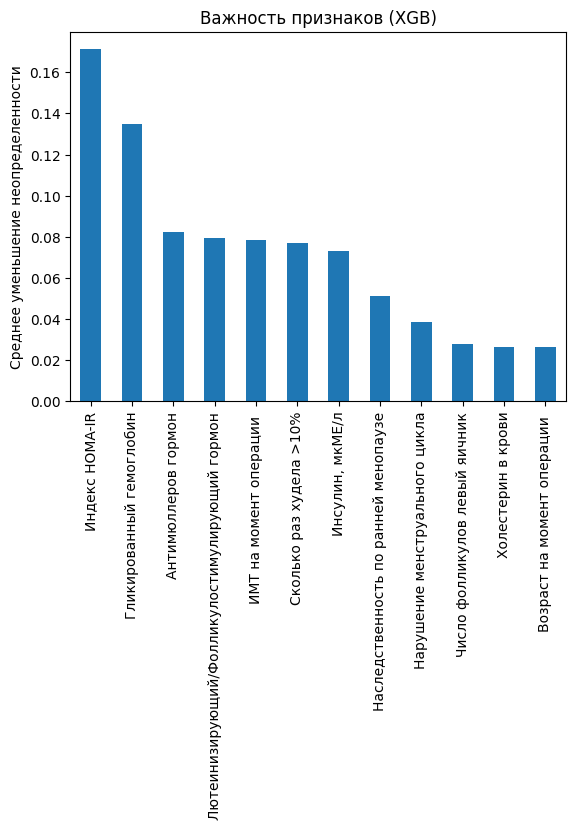

In [58]:
feature_names = X.columns

importances = []
for column in xgb_weights.columns:
    importances.append(mean(xgb_weights[column]))

feature_scores = pd.Series(importances, index=xgb_weights.columns).sort_values(ascending=False)

feature_scores = feature_scores.rename(rename_columns)

fig, ax = plt.subplots()
feature_scores[:12].plot.bar(ax=ax)
ax.set_title("Важность признаков (XGB)")
ax.set_ylabel("Среднее уменьшение неопределенности")
plt.show()

# Метод главных компонент

In [41]:
from sklearn import decomposition
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'PCA')

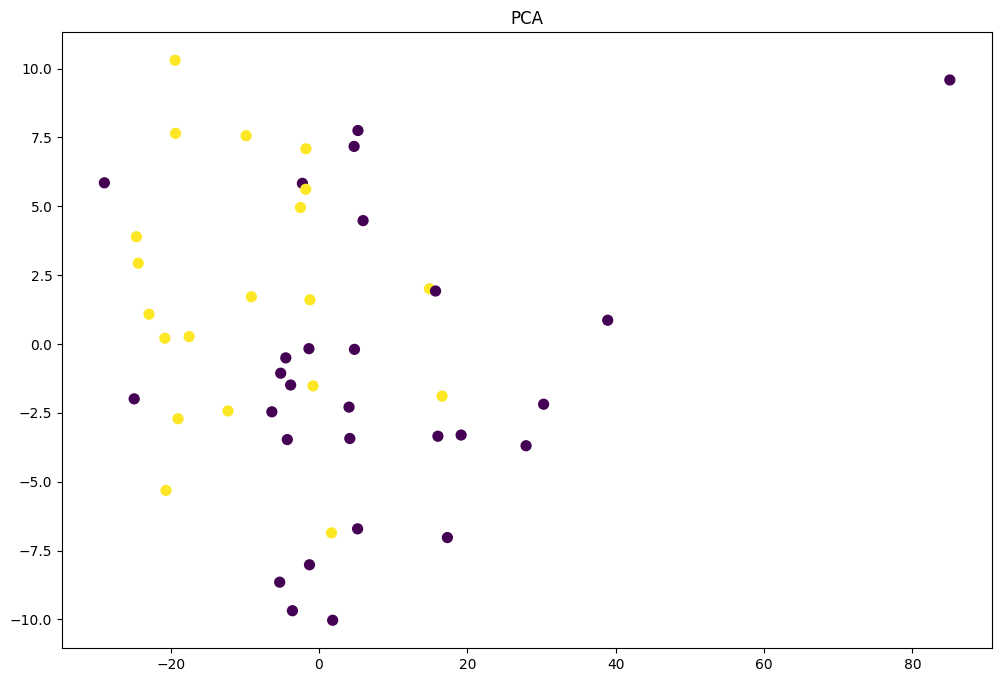

In [42]:
# Visualizing using PCA
pca = decomposition.PCA(n_components=4)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=y.values, s=50, cmap='viridis')
plt.title('PCA')

In [43]:
for i, component in enumerate(pca.components_):
    print(
        "{} component: {}% of initial variance".format(
            i + 1, round(100 * pca.explained_variance_ratio_[i], 2)
        )
    )

1 component: 84.64% of initial variance
2 component: 5.86% of initial variance
3 component: 2.96% of initial variance
4 component: 2.03% of initial variance


Text(0.5, 1.0, 'PCA')

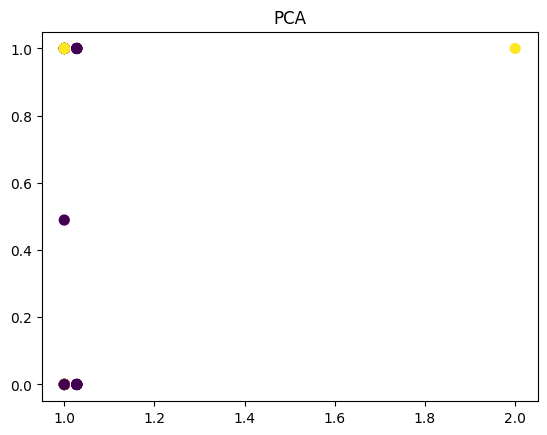

In [44]:
plt.scatter(list(X.iloc[:, 0]), list(X.iloc[:, 2]), c=y.values, s=50, cmap='viridis')
plt.title('PCA')